In [ ]:
!pip install tensorflow==2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.7.0


In [1]:
!pip install tensorflow

In [2]:
!pip install keras numpy matplotlib mnist

In [7]:
!pip install tensorflow_datasets

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=true)

NameError: ignored

In [4]:
!pip install tensorflow

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=true)

NameError: ignored

In [ ]:
import true
import requests

ModuleNotFoundError: ignored

In [ ]:
import requests

In [9]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteR0YKCK/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [10]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [11]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmphm8ph8motfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [ ]:
for i, example in enumerate(dataset['train']):
#example = (image, label)
image, label = example
save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
print (save_ dir)
break

IndentationError: ignored

In [ ]:
for i, example in enumerate(dataset['train']):
#example = (image, label)
image, label = example
save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
print(save_ dir)
break

IndentationError: ignored

In [12]:
for i, example in enumerate(dataset['train']):
    # example = (image, label)
    image, label = example
    save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
    os.makedirs(save_dir, exist_ok=True)

    filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
    tf.keras.preprocessing.image.save_img(filename, image.numpy())
    #print(filename)
    #break


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential


In [14]:
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.10,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(150, 150),
    batch_size=216,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(150, 150),
    batch_size=216,
    class_mode='binary',
    subset='validation'
)


Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd layer CNN
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())
model.add(Dropout(0.5))

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # You can adjust the dropout rate as needed
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0

In [16]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
87/87 [==============================] - 182s 2s/step - loss: 2.9471 - accuracy: 0.6075 - val_loss: 1.3349 - val_accuracy: 0.5012
Epoch 2/10
87/87 [==============================] - 165s 2s/step - loss: 0.9984 - accuracy: 0.6653 - val_loss: 0.9364 - val_accuracy: 0.5048
Epoch 3/10
87/87 [==============================] - 165s 2s/step - loss: 0.6176 - accuracy: 0.7043 - val_loss: 1.7855 - val_accuracy: 0.5027
Epoch 4/10
87/87 [==============================] - 168s 2s/step - loss: 0.5331 - accuracy: 0.7379 - val_loss: 1.1654 - val_accuracy: 0.5517
Epoch 5/10
87/87 [==============================] - 175s 2s/step - loss: 0.5041 - accuracy: 0.7560 - val_loss: 1.0152 - val_accuracy: 0.5885
Epoch 6/10
87/87 [==============================] - 174s 2s/step - loss: 0.4759 - accuracy: 0.7699 - val_loss: 0.9575 - val_accuracy: 0.6231
Epoch 7/10
87/87 [==============================] - 179s 2s/step - loss: 0.4711 - accuracy: 0.7792 - val_loss: 0.5848 - val_accuracy: 0.7338
Epoch 8/10
87

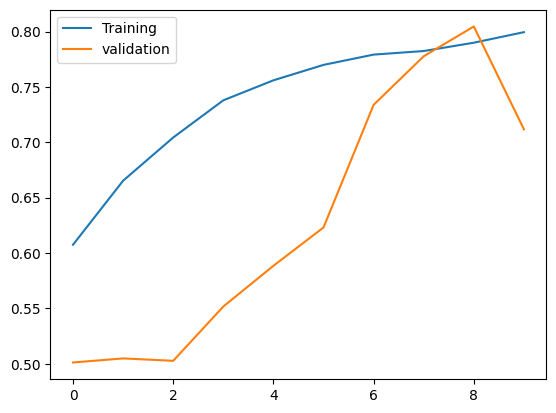

In [18]:
history.history
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend(['Training','validation'])


In [23]:
#save model
model.save('cats_vs_dogs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:

# Provide the full path to the .h5 file if it's not in the same directory
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')


In [75]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace 'img_url' with a direct image link
img_url = "https://cdn.pixabay.com/photo/2021/07/13/11/34/cat-6463284_640.jpg"

img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Correct the variable name here
img_array = img_array / 255.0

# Assuming 'model' is your loaded and compiled model
prediction = model.predict(img_array)
TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]









1/1 [==============================] - 0s 21ms/step


'cat'

In [74]:
TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]

'cat'

In [50]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')